## Installation

In [1]:
!pip install dbr opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 16.7 MB/s eta 0:00:00


## Set a license key to activate Dynamsoft Barcode SDK

[![](https://img.shields.io/badge/Get-30--day%20FREE%20Trial%20License-blue)](https://www.dynamsoft.com/customer/license/trialLicense/?product=dbr)

## Upload barcode images for recognition

FileUpload(value={}, accept='image/*', description='Upload')

Format: CODABAR, Text: 31383096022010


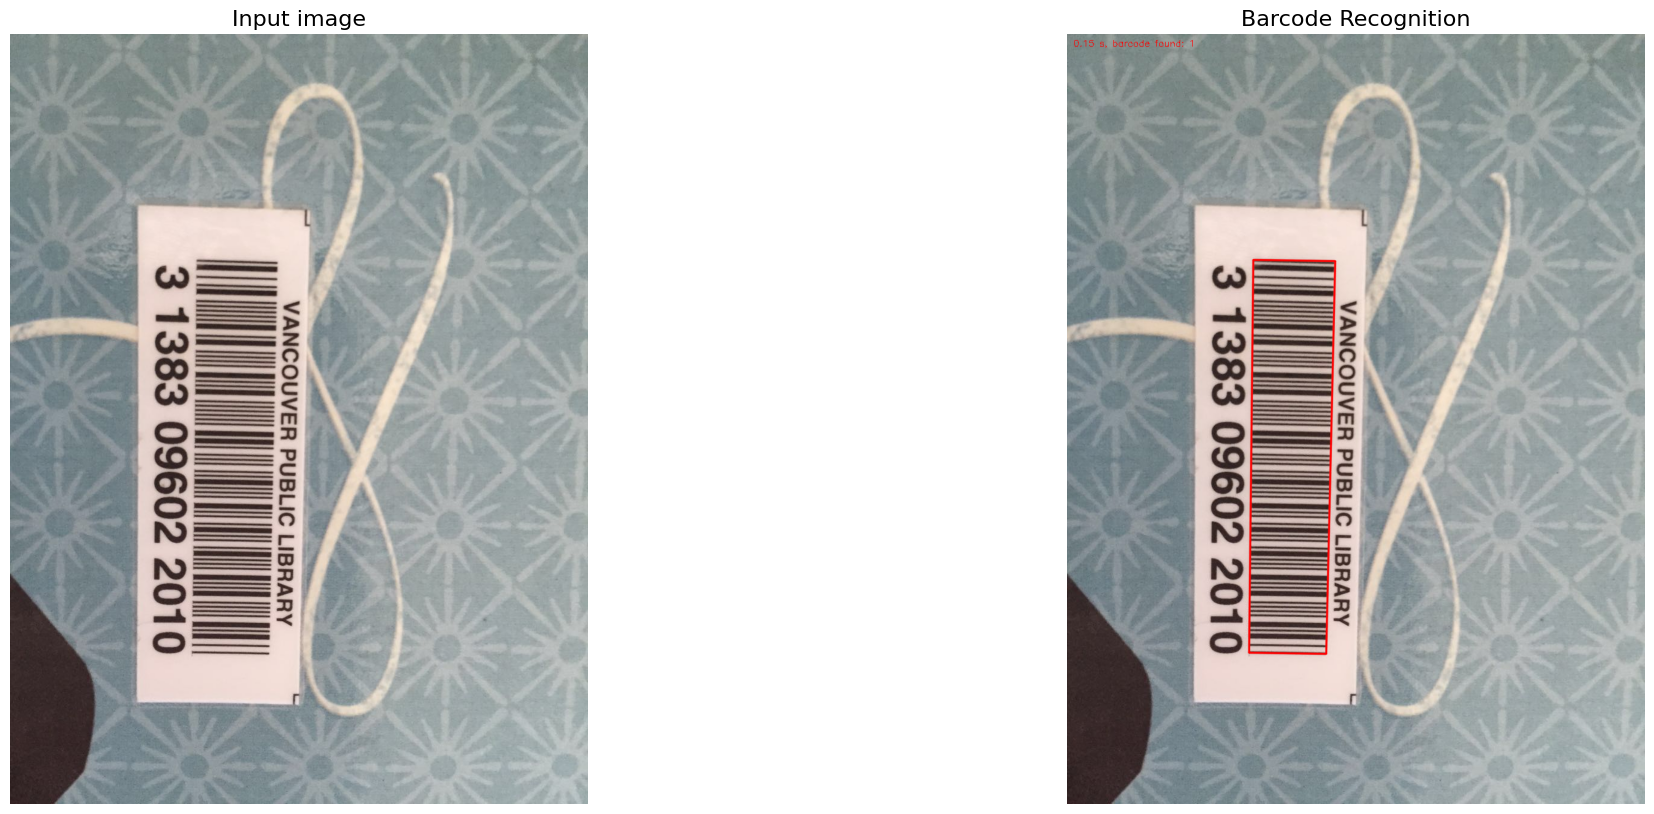

In [3]:
from ipywidgets import FileUpload
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from dbr import *
import time

reader = BarcodeReader()
license_key = "DLS2eyJoYW5kc2hha2VDb2RlIjoiMjAwMDAxLTE2NDk4Mjk3OTI2MzUiLCJvcmdhbml6YXRpb25JRCI6IjIwMDAwMSIsInNlc3Npb25QYXNzd29yZCI6IndTcGR6Vm05WDJrcEQ5YUoifQ=="
reader.init_license(license_key)

def decode(frame):

    before = time.time()
    results = reader.decode_buffer(frame)
    after = time.time()

    COLOR_RED = (0,0,255)
    thickness = 2
    margin = 1
    text_x = 10; text_y = 20
    if results != None:
        found = len(results)
        for result in results:
            print("Format: %s, Text: %s" % (result.barcode_format_string, result.barcode_text))
            text = result.barcode_text
            points = result.localization_result.localization_points
            data = np.array([[points[0][0], points[0][1]], [points[1][0], points[1][1]], [points[2][0], points[2][1]], [points[3][0], points[3][1]]])
            cv.drawContours(image=frame, contours=[data], contourIdx=-1, color=COLOR_RED, thickness=thickness, lineType=cv.LINE_AA)
#             cv.putText(frame, result.barcode_text, (np.min(data[:,0]) - margin, np.min(data[:,1]) - margin), cv.FONT_HERSHEY_SIMPLEX, 0.5, COLOR_RED)

        cv.putText(frame, '%.2f s, barcode found: %d' % (after - before, found), (text_x, text_y), cv.FONT_HERSHEY_SIMPLEX, 0.5, COLOR_RED)
    else:
        cv.putText(frame, '%.2f s, barcode found: %d' % (after - before, 0), (text_x, text_y), cv.FONT_HERSHEY_SIMPLEX, 0.5, COLOR_RED)


def show_image(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1)
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Barcode Recognition', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)

def on_upload_change(change):
    if not change.new:
        return
    up = change.owner
    for _, data in up.value.items():
        image_buffer = np.frombuffer(data['content'], dtype=np.uint8)
        img = cv.imdecode(image_buffer, 1)

        new_img = img.copy()
        # barcode recognition
        decode(new_img)

        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        new_img = cv.cvtColor(new_img, cv.COLOR_BGR2RGB)
        show_image(img, new_img)

    up.value.clear()

uploader = FileUpload(accept='image/*', multiple=False)
uploader.observe(on_upload_change)
uploader